# Исследование пользователей по типу подписки в комании GoFast.



**Цель проекта:** 

Провести исследование данных сервиса по аренде самокатов GoFast. определить **являются ли пользователи с подпиской выгоднее чем пользователи без подписки.**


**Ход исследования:**

    1. Проведем анализ данных. Изучим общую информацию о пользователях. Визуализируем данные.
    2. Создадим объединенный датасет из предоставленных наборов данных.
    4. Посчитаем выручку по группам пользователей (ultra/free).
    5. Проверим гипотезы: 1) Тратят ли пользователи с подпиской больше времени на поездки
                          2) Не превышает ли среднее расстояние которое проезжают пользователей с подпиской 3130 метров.
                          3) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
            
          

**Типы подписки:**

*без подписки*

    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;


*с подпиской Ultra*

    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.

## Обзор данных

**Пользователи — users_go.csv**

`user_id`	уникальный идентификатор пользователяж

`name`	имя пользовател

`age`	возраст

`city`	город

`subscription_type`	тип подписки (free, ultra)

**Поездки — rides_go.csv**

`user_id`	уникальный идентификатор пользователя

`distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)

`duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку

`date`	дата совершения 

**Подписки — subscriptions_go.csv**

`subscription_type`	тип подписки

`minute_price`	стоимость одной минуты поездки по данной подписке

`start_ride_price`	стоимость начала поездки

`subscription_fee`	стоимость ежемесячного платежа


    
    
    
    

**Импорт необходимых библиотек:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
dataframes = [users, rides, subscriptions]

### Выведем первые строки и общую информацию, изучим данные

In [5]:
#Цикл для вывода общей информации и описательной статистики
for data in dataframes: 
    display(data.head(5))
    display(data.info())
    display(data.describe())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,age
count,"1,565.00","1,565.00"
mean,762.63,24.92
std,443.26,4.55
min,1.00,12.00
25%,378.00,22.00
50%,762.00,25.00
75%,"1,146.00",28.00
max,"1,534.00",43.00


,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration
count,"18,068.00","18,068.00","18,068.00"
mean,842.87,"3,070.66",17.81
std,434.73,"1,116.83",6.09
min,1.00,0.86,0.50
25%,487.00,"2,543.23",13.60
50%,889.00,"3,133.61",17.68
75%,"1,213.25","3,776.22",21.72
max,"1,534.00","7,211.01",40.82


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,minute_price,start_ride_price,subscription_fee
count,2.00,2.00,2.00
mean,7.00,25.00,99.50
std,1.41,35.36,140.71
min,6.00,0.00,0.00
25%,6.50,12.50,49.75
50%,7.00,25.00,99.50
75%,7.50,37.50,149.25
max,8.00,50.00,199.00


### Построим гистограммы для визуального представления о числовых значениях

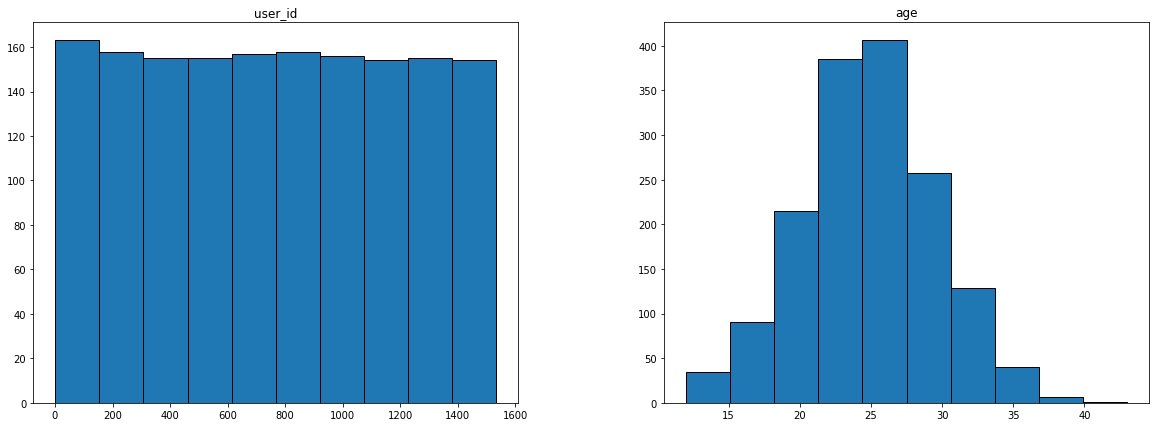

In [6]:
# Построим гистограмму для наглядного представления о числовых значениях
users.hist(figsize=(20, 7), bins=10, edgecolor="black", grid = False) 
plt.show()

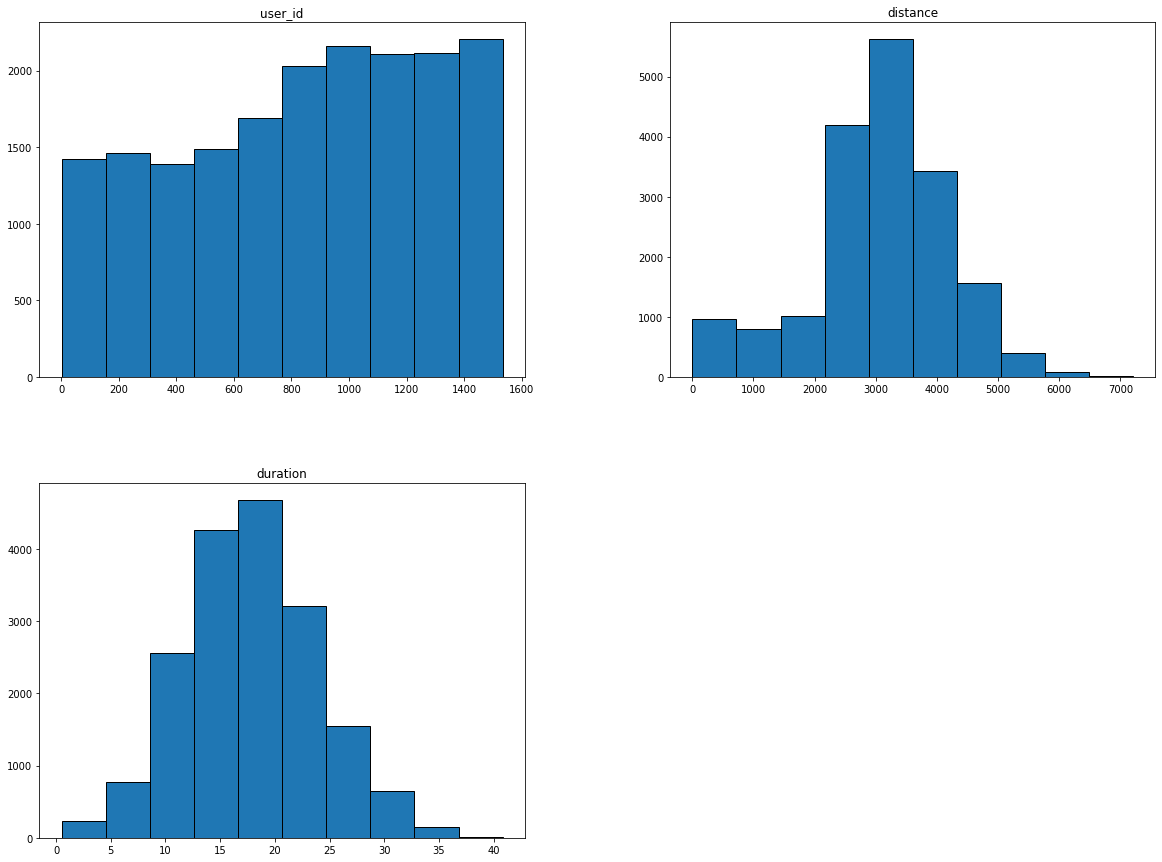

In [7]:
rides.hist(figsize=(20, 15), bins=10, edgecolor="black", grid = False) 
plt.show()

### Вывод:

Входе изучения данных выяснилось:

    * Названия колонок соответствуют стилю snake_case.
    * Типы данных в колонках соответствуют ожиданиям, за исключением колонки с датами в таблице 'rides'. На этапе предобработки потребуется поменять тип данных на *to_datetime*.
    
    Таблица (User):

    1. датафрейм состоит из 1565 строк и 5 колонок
    2. датафрейм содердит числовые и тексторые значения. 
    3. колонки имеют правильные названия
    4. в датасете отсутствуют пропущенные значения.
    5. в датасете имеются дубликаты которые будут обработаны на этапе предобработки
    6. возраст пользователей имеет нормальное распределение 
 
     Таблица (Rides): 
     
    1. датафрейм состоит из 18068 строк и 4 колонки
    2. датафрейм содердит числовые и тексторые значения. 
    3. колонки имеют правильные названия
    4. в датасете отсутствуют пропущенные значения.
    5. колонки имеют правильный тип данных, за исключением колонки date - в преобработке изменим тип на to_datetime
     
     
     Таблица (subscriptions):
     
    1. Датафрейм состоит из 2 строк и 4 колонок
    2. Таблица содержит стоимость  пользования самокатом с подпиской и без  
   
     
     
     

## Предобработка данных

In [8]:
rides.head(5)

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


### Приведем столбец date в таблице (Rides) к типу даты pandas

In [9]:
# приведем тип к удобному формату
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
#проверим полученный результат
rides['date'] 

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

### Создадим столбец с номером месяца на основе rides['data']

In [11]:
#создание дополнительного столбца с указанием номера месяца
rides['month'] = pd.DatetimeIndex(rides['date']).month 

In [12]:
# Начальная дата в датафрейме
rides['date'].min() 

Timestamp('2021-01-01 00:00:00')

In [13]:
# Последняя дата в датасете
rides['date'].max() 

Timestamp('2021-12-30 00:00:00')

In [14]:
# проверим полученный резульат
rides.head(5)

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


###  Проверим наличие пропущенных значений и дубликатов в датафреймах. 

**Поиск пропущенных значений:**

In [15]:
dataframes = [users, rides, subscriptions]

#проверим таблицы на предмет пропущенных значений
for data in dataframes: 
    display(data.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

пропусков в таблицах не обнаружено

**Поиск явных дубликатов:**

In [16]:
dataframes = [users, rides, subscriptions]

for data in dataframes:
    display(data.head(5))
    display(data.duplicated().sum())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


31

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


0

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


0

в таблице (users) - обнаружен 31 явный дубликат

In [17]:
# выведем список явных дубликатов таблицы users
duplicated_users = users[users.duplicated()] 
duplicated_users.head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free


In [18]:
users.value_counts().sum()

1565

удалим из таблицы  users 31 явный дубликат.

In [19]:
# удалим явные дубликаты и обновим индексацию, чтобы неосталось пропусков.
users = users.drop_duplicates() 

In [20]:
# выведем список явных дубликатов таблицы users
duplicated_users = users[users.duplicated()]


# Проверим результат удаления дубликатов:
duplicated_users.head()

,user_id,name,age,city,subscription_type


In [21]:
# дубликаты удалены корректно.
users.value_counts().sum() 

1534

### Вывод:

На этапе предобработки данных мы проверили датасеты на предмет наличия пропущенных значений и явных дубликатов.

    Пропущенных значений - не обнаружено 
    Явные дубликаты в количестве 31 шт. найдеты в датасете Users.
    
Методом drop_duplicates() произвели удаление явных дубликатов и перепроверили данные после удаления, выводом суммы колличества строк.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

### Частота встречаемости городов

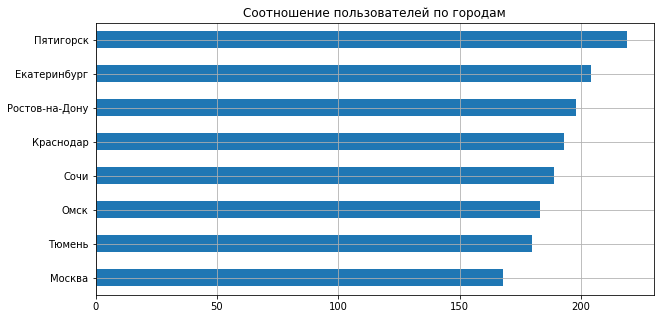

Пятигорск        14.00
Екатеринбург     13.00
Ростов-на-Дону   13.00
Краснодар        13.00
Сочи             12.00
Омск             12.00
Тюмень           12.00
Москва           11.00
Name: city, dtype: float64

In [22]:
users['city'].value_counts(ascending=True).plot(kind='barh',
                                                title='Соотношение пользователей по городам',
                                                figsize=(10,5),
                                                grid=True
                                               )
plt.show()

# Вывод процентного соотношения пользователей по городам.
round(users['city'].value_counts(normalize=True)*100)  

**Вывод:**

Из круговой диаграммы видно, что пользователи равномерно распределены по городам в процентном соотношении от 11-14 %. больше всего уникальных пользователей в г. Пятигорск 14%, в г.Москва наименьшее число пользователей 11%. 

 ### Cоотношение пользователей с подпиской и без подписки

Построим круговую гистограмму соотношения пользователей с подпиской и без. Возьмём данные из таблицы users колонки subscription_type

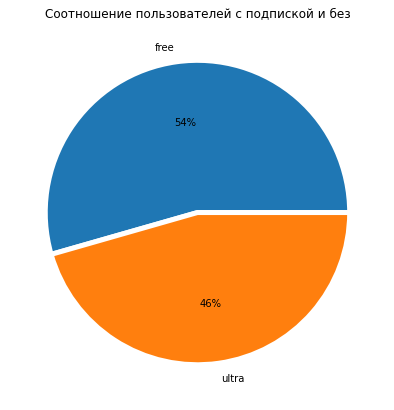

free     835
ultra    699
Name: subscription_type, dtype: int64

In [23]:
users['subscription_type'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Соотношение пользователей с подпиской и без',
    )
plt.ylabel('')
plt.show()

users['subscription_type'].value_counts()

**Вывод:**  Пользователей с подпиской меньше - 46% (719 человек). Без подписки - 54% (846 человек).

### Возраст пользователей

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

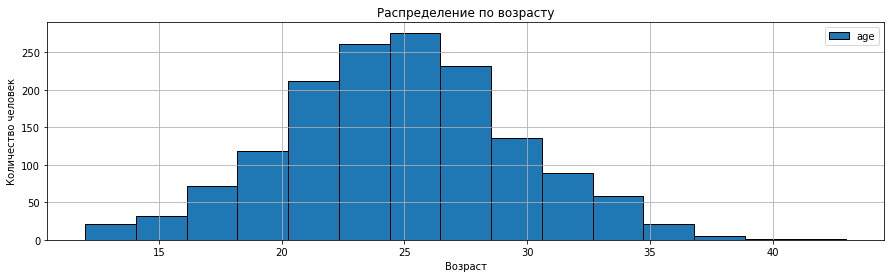

In [24]:
# гистограмма распределения возраста
fig, ax = plt.subplots()

users.plot(kind='hist', 
           edgecolor='black',
           y='age',
           bins=15,
           title='Распределение по возрасту',
           figsize=(15, 4),
           grid=True, 
           ax=ax)


#  Добавляем подписи к осям:
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество человек');

# вывод описательной статистики:
users['age'].describe()

**Вывод:**

Распределение по возрасту соответствует "нормальному распределению", средний возвраст составляет 25 лет. Возраст большинства пользователей распределен в диапазоне от 22 лет до 28. Минимальный возраст пользователя составляет 12 лет, а максимальный 43 года.

### Расстояние, которое пользователь преодолел за одну поездку

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

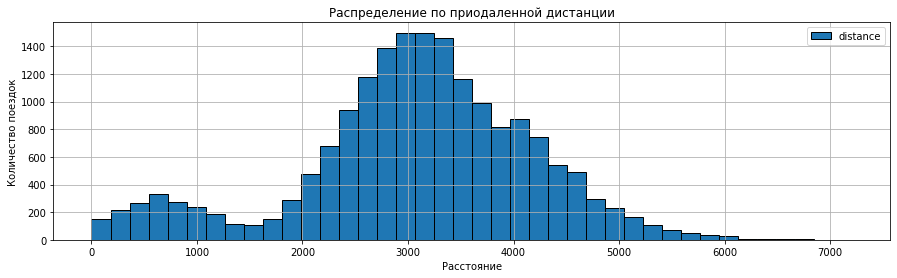

In [25]:
# гистограмма распределения расстояния за одну поездку
fig, ax = plt.subplots()

rides.plot(kind='hist', 
           edgecolor='black',
           y='distance',
           bins=40,
           title='Распределение по приодаленной дистанции',
           figsize=(15, 4),
           grid=True, 
           ax=ax)


#  Добавляем подписи к осям:
ax.set_xlabel('Расстояние')
ax.set_ylabel('Количество поездок');

# Вывод описательной статистики:
rides['distance'].describe()

In [26]:
rides.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


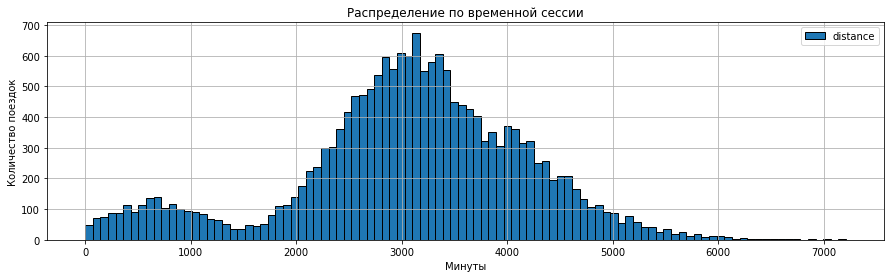

In [27]:
fig, ax = plt.subplots()

rides.plot(kind='hist', 
           edgecolor='black',
           y='distance',
           bins=100,
           title='Распределение по временной сессии',
           figsize=(15, 4),
           grid=True, 
           ax=ax)


#  Добавляем подписи к осям:
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество поездок');
plt.show()


**Вывод:**

Расстояние которое совершают пользователи GoFast:

    Медианное значение - 3133 м.
    Максимальное - 7211 метров
    Минимальное  - меньше 1 метра. (вероятнее всего у пользователя не получилось воспользоваться самокатом или ошибка приложения) 

На гистограмме видно два пиковых значения. пользователи, совершают короткие поездки, в среднем около 500 метров и те кто в среднем проезжает 3000 метров. Данные группы различаются по объему совершаемых поездок, больше тех, кто предпочитает передвигаться на относительно дальние расстояния. 

### Продолжительность поездок

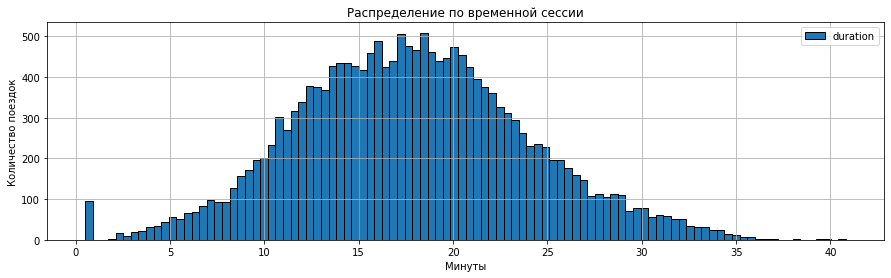

In [28]:
# гистограмма распределения времени за одну поездку
fig, ax = plt.subplots()

rides.plot(kind='hist', 
           edgecolor='black',
           y='duration',
           bins=100,
           title='Распределение по временной сессии',
           figsize=(15, 4),
           grid=True, 
           ax=ax)


#  Добавляем подписи к осям:
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество поездок');
plt.show()



В связи с наличием аномального количества коротких поездок со временем около нуля минут. Изучим короткие поездки. 

In [29]:
# фильтрация коротких поездок:
rides_anomaly = rides.query('duration < 0.6')
rides_anomaly

,user_id,distance,duration,date,month
6531,701,"4,196.45",0.50,2021-08-31,8
6570,704,"4,830.82",0.50,2021-10-14,10
6680,712,"4,684.00",0.50,2021-03-04,3
6695,713,"5,215.64",0.50,2021-02-25,2
6768,718,"5,197.44",0.50,2021-02-11,2
...,...,...,...,...,...
17004,1460,"5,531.34",0.50,2021-01-19,1
17242,1477,"6,724.93",0.50,2021-01-12,1
17314,1483,"4,445.48",0.50,2021-03-06,3
17505,1496,"5,722.55",0.50,2021-02-14,2


In [30]:
# посмотрим как данные корелируют между собой
rides_anomaly.corr()

,user_id,distance,duration,month
user_id,1.00,0.09,NaN,-0.02
distance,0.09,1.00,NaN,-0.06
duration,NaN,NaN,NaN,NaN
month,-0.02,-0.06,NaN,1.00


Мы отфильтровали короткие поездки и нашли причину аномального пика. Аномалия в том, что 95 поездок были совершены за 30 секунд(duration=0.5).
Методом corr() мы изучили аномальные поездки и не обнаружили никакой зависимости между данными. Вероятнее всего ошибка в фиксации времени связана с ошибкой при выгрузке , повереждением файла или человеческим фактором.

Данные строки можно : 
1. удалить - т.к. выборка не велика и она не повлияет на дальнейшее исследование.
2. оставить как есть, т.к. в остальных колонках данные соответсвтуют нормальным.



In [31]:
# удалим строки где duration < 0.6
rides = rides.query('duration > 0.6') 
rides.count()

user_id     17973
distance    17973
duration    17973
date        17973
month       17973
dtype: int64

Удалили сроки с аномальными значениям, теперь выведем гистрограмму повторно:

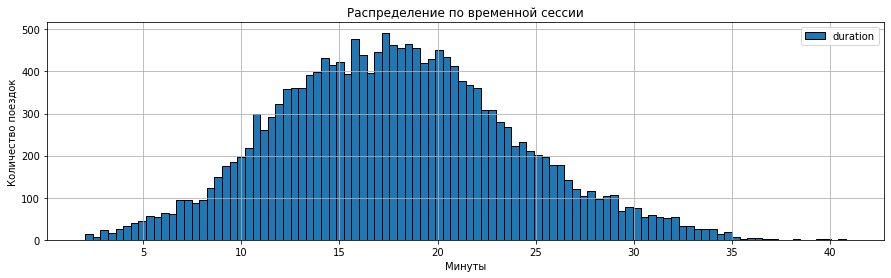

,user_id,distance,duration,month
count,"17,973.00","17,973.00","17,973.00","17,973.00"
mean,841.55,"3,059.86",17.90,6.49
std,435.14,"1,108.81",5.98,3.44
min,1.00,0.86,2.04,1.00
25%,484.00,"2,538.84",13.67,4.00
50%,887.00,"3,129.03",17.71,6.00
75%,"1,213.00","3,762.64",21.75,9.00
max,"1,534.00","7,066.00",40.82,12.00


In [32]:
# гистограмма распределения времени за одну поездку
fig, ax = plt.subplots()

rides.plot(kind='hist', 
           edgecolor='black',
           y='duration',
           bins=100,
           title='Распределение по временной сессии',
           figsize=(15, 4),
           grid=True, 
           ax=ax)


#  Добавляем подписи к осям:
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество поездок');
plt.show()

rides.describe()

**Вывод:** 
В столбце duration присутствовали аномальные значения в количестве 95 шт. учитывая что количество таких значение не велико и не повлияет на дальнейшее исследование, принято решение удалить их. 

Данные имеют нормальное распределение. 
    Среднее время поездок примерно равно 18 минут
    минимальное время - 2 минуты 
    максимальное время - 40 минут
    
 Чаще всего пользователи берут самокат на время от 13 минут до 21 минуты.
 

## Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

In [33]:
# Методом merge() объединим две таблицы.
new_data = users.merge(rides, on='user_id') 
new_data

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,"3,781.10",19.82,2021-11-04,11
17969,1534,Альберт,25,Краснодар,free,"2,840.42",21.41,2021-11-16,11
17970,1534,Альберт,25,Краснодар,free,"3,826.19",18.44,2021-11-18,11
17971,1534,Альберт,25,Краснодар,free,"2,902.31",16.67,2021-11-27,11


В новую таблицу new_data дабавим данные о тарифах из таблицы subscriptions: 


In [34]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [35]:
new_data = new_data.merge(subscriptions, on='subscription_type') #Методом merge() объединим две таблицы.
new_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [36]:
new_data.duplicated().sum() # Дубликаты отсутствуют 

0

In [37]:
new_data.isna().sum() # пропусков нет.

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Создадим два датафрейма из датафрейма *new_data*, созданного на этапе № 4:

    c данными о пользователях без подписки;

    с данными о пользователях с подпиской.

In [38]:
#создадим еще два датасета из датафрейма созданного на 4 Этапе:

# c данными о пользователях без подписки
no_subscription = new_data.query('subscription_type=="free"')

# с данными о пользователях с подпиской
yes_subscription = new_data.query('subscription_type=="ultra"')

In [39]:
yes_subscription.head() #данные о пользователях с подпиской

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [40]:
no_subscription.head() #данные о пользователях без подписки

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,"2,515.69",14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,"4,004.43",20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,"1,205.91",9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,"3,047.38",17.43,2021-02-14,2,8,50,0


Визуализируем  информацию о расстоянии и времени поездок для пользователей обеих категорий

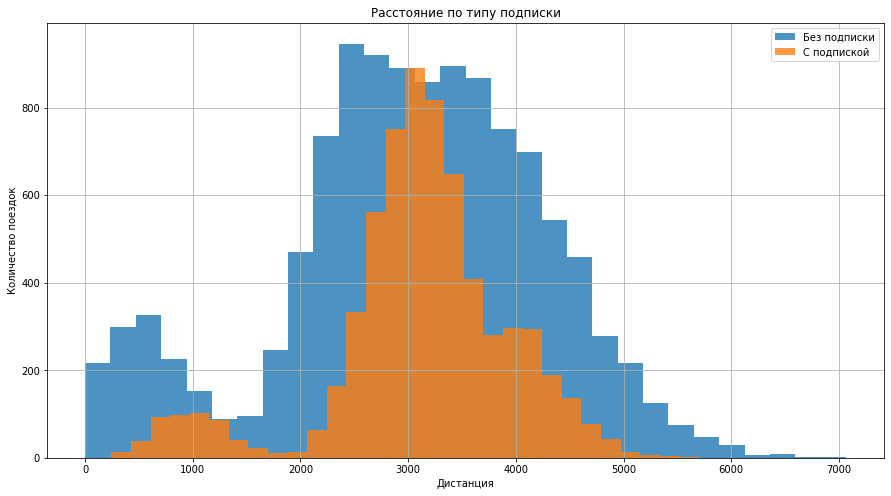

In [41]:
fig, axes = plt.subplots(figsize=(15,8))
no_subscription.plot(y='distance', kind='hist', grid = True, bins=30, alpha=0.8,label='Без подписки', ax=axes)
yes_subscription.plot(y='distance', kind='hist', grid=True, bins=30, alpha=0.8,label='C подпиской', ax=axes)

axes.set_title('Расстояние по типу подписки')
axes.set(xlabel='Дистанция', ylabel='Количество поездок')
plt.show()

**Расстояние по типу подписки:**

График расстояния имеет нормальное распределение, с двумя характерными пиковыми значениями. Пользователи без подписки совершают больше коротких поездок, чем пользователи с подпиской.

Для пользователей с подпиской: среднее расстояние - 3115 метров, нормальное распределение в диапазоне от 2785 до 3560

Для пользователей без подписки: среднее расстояние - 3028 метров, нормальное распределение в диапазоне от 2360 до 3883

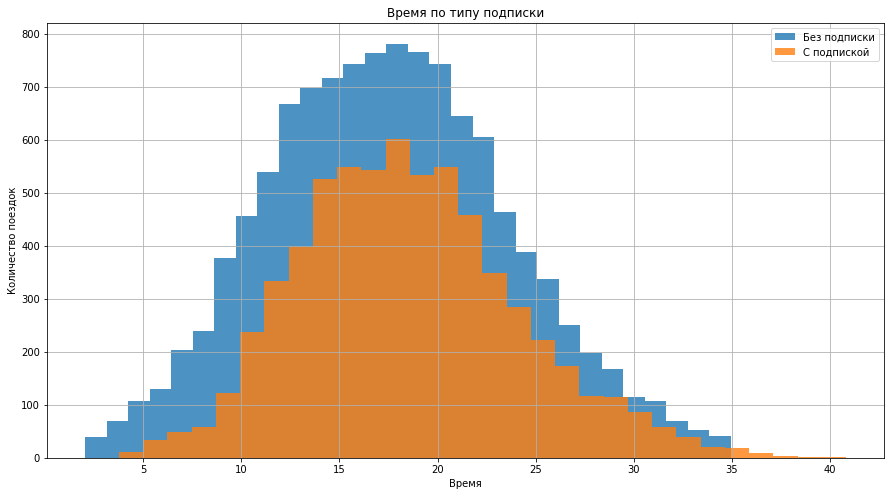

In [42]:
fig, axes = plt.subplots(figsize=(15,8))
no_subscription.plot(y='duration', kind='hist', grid = True, bins=30, alpha=0.8,label='Без подписки', ax=axes)
yes_subscription.plot(y='duration', kind='hist', grid=True, bins=30, alpha=0.8,label='C подпиской', ax=axes)

axes.set_title('Время по типу подписки')
axes.set(xlabel='Время', ylabel='Количество поездок')
plt.show()

**Время по типу подписки:**



График времени имеет нормльное распределение без аномальных значений.

Для пользователей с подпиской: среднее время - 18 мин. 30 сек., нормальное распределение времени в диапазоне от 15 до 22 минут 

Для пользователей без подписки: среднее время - 17 мин. 30 сек., нормальное распределение времени в диапазоне от 13 до 22 минут

Выведем описательную статистику по каждой группе:

In [43]:
yes_subscription.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,"6,500.00","6,500.00","6,500.00","6,500.00","6,500.00","6,500.00","6,500.00","6,500.00"
mean,348.73,24.89,"3,115.45",18.54,6.42,6.00,0.00,199.00
std,201.10,4.76,836.90,5.57,3.41,0.00,0.00,0.00
min,1.00,12.00,244.21,3.76,1.00,6.00,0.00,199.00
25%,175.00,22.00,"2,785.44",14.52,4.00,6.00,0.00,199.00
50%,351.00,25.00,"3,148.64",18.18,6.00,6.00,0.00,199.00
75%,525.00,28.00,"3,560.57",21.88,9.00,6.00,0.00,199.00
max,699.00,38.00,"5,699.77",40.82,12.00,6.00,0.00,199.00


In [44]:
no_subscription.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,"11,473.00","11,473.00","11,473.00","11,473.00","11,473.00","11,473.00","11,473.00","11,473.00"
mean,"1,120.76",24.89,"3,028.37",17.53,6.52,8.00,50.00,0.00
std,241.14,4.48,"1,235.54",6.16,3.45,0.00,0.00,0.00
min,700.00,12.00,0.86,2.04,1.00,8.00,50.00,0.00
25%,915.00,22.00,"2,360.88",13.09,4.00,8.00,50.00,0.00
50%,"1,123.00",25.00,"3,102.08",17.38,7.00,8.00,50.00,0.00
75%,"1,329.00",28.00,"3,883.98",21.64,9.00,8.00,50.00,0.00
max,"1,534.00",43.00,"7,066.00",34.95,12.00,8.00,50.00,0.00


## Подсчёт выручки

**Этап 5.1**

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма *new_data* с объединёнными данными из шага 4: 
найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [45]:
new_data.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [46]:
# Округлили тип данных до целых
new_data['duration'] = np.ceil(new_data['duration']) 

# Поменяем тип данных на (INT) 
new_data['duration'] = new_data['duration'].astype('int64') 

In [47]:
new_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",27,2021-08-28,8,6,0,199


In [48]:
# в переменной data_pivot сгруппируем данные по каждому пользователю: 
# суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц 

data_pivot = pd.pivot_table(new_data,
                            index=['user_id', 'month'],
                            values=['distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'],
                            aggfunc={'distance' : sum, 'duration' : sum, 'name' : len, 'subscription_type' : min, 'minute_price' : min, 'start_ride_price' : min, 'subscription_fee' : min})

# т.к. колличество поездок рассчитали по колонке name, изменим название на trips. 
data_pivot.rename(columns = {'name' : 'trips'}, inplace = True) 
data_pivot.head()

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

**Этап 5.2**

In [49]:
data_pivot.info() # проверим полученный результат 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11300 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11300 non-null  float64
 1   duration           11300 non-null  int64  
 2   minute_price       11300 non-null  int64  
 3   trips              11300 non-null  int64  
 4   start_ride_price   11300 non-null  int64  
 5   subscription_fee   11300 non-null  int64  
 6   subscription_type  11300 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 663.3+ KB


In [50]:
data_pivot.head()

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

В датасет **data_pivot** добавим новую колонку  **['revenue']** с помесячной выручкой 

In [51]:
data_pivot['revenue'] = 0

In [52]:
data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'revenue']

user_id  month
1        1        0
         4        0
         8        0
         10       0
         11       0
                 ..
699      6        0
         8        0
         9        0
         10       0
         12       0
Name: revenue, Length: 4533, dtype: int64

In [53]:
data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'duration']

user_id  month
1        1        42
         4         7
         8        46
         10       32
         11       56
                  ..
699      6        17
         8        45
         9        31
         10       16
         12       26
Name: duration, Length: 4533, dtype: int64

In [54]:
# Округлим значение времни к целому в большую сторону.
data_pivot['duration'] = data_pivot['duration'].apply(math.ceil) 
data_pivot['duration']

user_id  month
1        1        42
         4         7
         8        46
         10       32
         11       56
                  ..
1534     6        26
         8        48
         9        23
         11       78
         12       16
Name: duration, Length: 11300, dtype: int64

In [55]:
data_pivot

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   
...                 ...       ...           ...    ...               ...   
1534    6      3,409.47        26             8      2                50   
        8      7,622.45        48             8      2                50   
        9      4,928.17        23             8      1                50   
        11    13,350.02        78             8      4                50   
        12     2,371.71        16             8      1                50   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra        0  
        4                   199             ultra        0  
        8                   199             ultra        0  
        10                  199             ultra        0  
        11                  199             ultra        0  
...                         ...               ...      ...  
1534    6                     0              free        0  
        8                     0              free        0  
        9                     0              free        0  
        11                    0              free        0  
        12                    0              free        0  

[11300 rows x 8 columns]

In [56]:
# new
data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'revenue'] = \
                                                                          data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'minute_price'] * \
                                                                          data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'duration'] + \
                                                                          data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'start_ride_price'] + \
                                                                          data_pivot.loc[data_pivot['subscription_type'] == 'ultra', 'subscription_fee']

In [57]:
#new
data_pivot.loc[data_pivot['subscription_type'] == 'free', 'revenue'] = \
                                                                         data_pivot.loc[data_pivot['subscription_type'] == 'free', 'minute_price'] * \
                                                                         data_pivot.loc[data_pivot['subscription_type'] == 'free', 'duration'] + \
                                                                         data_pivot.loc[data_pivot['subscription_type'] == 'free', 'start_ride_price'] + \
                                                                         data_pivot.loc[data_pivot['subscription_type'] == 'free','subscription_fee']

In [58]:
data_pivot

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   
...                 ...       ...           ...    ...               ...   
1534    6      3,409.47        26             8      2                50   
        8      7,622.45        48             8      2                50   
        9      4,928.17        23             8      1                50   
        11    13,350.02        78             8      4                50   
        12     2,371.71        16             8      1                50   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra      451  
        4                   199             ultra      241  
        8                   199             ultra      475  
        10                  199             ultra      391  
        11                  199             ultra      535  
...                         ...               ...      ...  
1534    6                     0              free      258  
        8                     0              free      434  
        9                     0              free      234  
        11                    0              free      674  
        12                    0              free      178  

[11300 rows x 8 columns]

In [61]:
data_pivot.head()

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra      451  
        4                   199             ultra      241  
        8                   199             ultra      475  
        10                  199             ultra      391  
        11                  199             ultra      535

**Вывод:** 

Создан обновленный датасет **data_pivot** на основе датафрейма с объединенными данными **new_data**.

Найдено суммарное расстояние, число поездок и суммарное время для каждого пользователя за каждый месяц. 

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. 

Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

**Задание 6.1**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: 

(Н0) - Пользователи **с подпиской** тратят столько же времени, как и пользователи **без подписки**.

(Н1) - Пользователи **с подпиской** тратят больше времени на поездки, чем пользователи **без подписки**.

In [62]:
ultra = yes_subscription['duration']
free = no_subscription['duration']

alpha = 0.05

results = st.ttest_ind(ultra,free,alternative='greater') # т.к. у нас две независимые выборки, применим _ind()

print('p - значение:', results.pvalue)

if results.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')


p - значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


Визуализируем данные по нашей гипотезе для большего убеждения:

In [63]:
new_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,"3,781.10",20,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,"2,840.42",22,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,"3,826.19",19,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,"2,902.31",17,2021-11-27,11,8,50,0


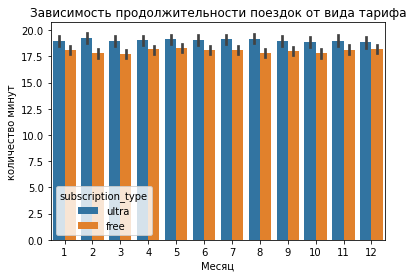

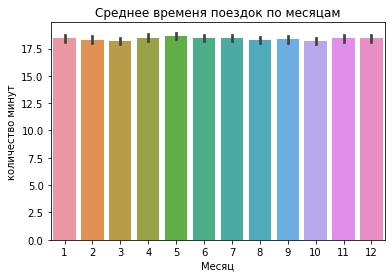

count   17,973.00
mean        18.39
std          5.98
min          3.00
25%         14.00
50%         18.00
75%         22.00
max         41.00
Name: duration, dtype: float64

In [64]:
df = sns.barplot(x='month', 
            y='duration', 
            data=new_data,
            hue='subscription_type')
                 
df.set_title('Зависимость продолжительности поездок от вида тарифа')
df.set(xlabel='Месяц', ylabel='количество минут')
plt.show()


# Дополнительно выведем общие средние значения продолжительности поездок для каждой категории польздователей
df = sns.barplot(x='month', 
            y='duration', 
            data=new_data,
           )
                 
df.set_title('Среднее временя поездок по месяцам')
df.set(xlabel='Месяц', ylabel='количество минут')
plt.show()

# Выведем описательную статистику по столбцу Duration:
new_data['duration'].describe()

**Вывод:**

Т.к. мы отвергаем нулевую гипотезу и подтверждаем соответсвтующим графиком: Вероятнее всего, пользователи **с подпиской** тратят больше времени на поездки, чем пользователи **без подписки**.

**Задание 6.2**

Расстояние одной поездки в 3130 — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [65]:
yes_subscription.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


(Н0) - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, **равно** 3130 метров

(Н1) - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, **превышает** 3130 метров

In [66]:
distance = yes_subscription['distance']
optimal_value = 3130
alpha = 0.05

results = st.ttest_1samp(
    distance,
    optimal_value,
    alternative='greater')
print('p - значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p - значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


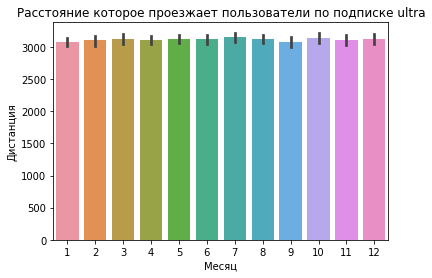

In [67]:
df = sns.barplot(x='month', 
            y='distance', 
            data=yes_subscription,
                )
                 
df.set_title('Расстояние которое проезжает пользователи по подписке ultra')
df.set(xlabel='Месяц', ylabel='Дистанция')
plt.show()



In [68]:
yes_subscription['distance'].describe() # Посмотрим на описательную статистику чтобы убедиться, что среднее в районе 3130

count   6,500.00
mean    3,115.45
std       836.90
min       244.21
25%     2,785.44
50%     3,148.64
75%     3,560.57
max     5,699.77
Name: distance, dtype: float64

**Вывод:**
    
Значение P-value больше, чем уровень статистической значимости, соответственно мы не можем отвергнуть нулевую гипотезу. 

Т.е. пользователи с подпиской вероятнее всего будут совершать поездки в среднем около 3130 метров. 

В подтверждение теории построили график и вывели описательную статистику.

**Задание 6.3**

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

(Н0) - помесячная выручка от пользователей с подпиской **равна** помесячной выручке пользователей без подписки;

(Н1) - помесячная выручка от пользователей с подпиской **выше** помесячной выручке пользователей без подписки;

In [69]:
data_pivot.head()

distance  duration  minute_price  trips  start_ride_price  \
user_id month                                                              
1       1      7,027.51        42             6      2                 0   
        4        754.16         7             6      1                 0   
        8      6,723.47        46             6      2                 0   
        10     5,809.91        32             6      2                 0   
        11     7,003.50        56             6      3                 0   

               subscription_fee subscription_type  revenue  
user_id month                                               
1       1                   199             ultra      451  
        4                   199             ultra      241  
        8                   199             ultra      475  
        10                  199             ultra      391  
        11                  199             ultra      535

In [70]:
ultra_revenge = data_pivot.loc[data_pivot.subscription_type == 'ultra', 'revenue']
free_revenge = data_pivot.loc[data_pivot.subscription_type == 'free', 'revenue']
results = st.ttest_ind(ultra_revenge, free_revenge, alternative='greater')
alpha = 0.05

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 6.029098397097659e-176
Отвергаем нулевую гипотезу


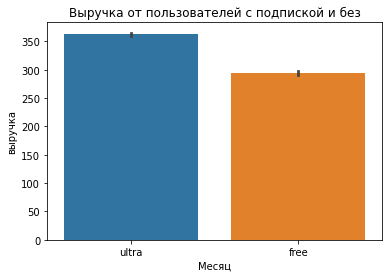

In [71]:
df = sns.barplot(x='subscription_type',
                 y='revenue',  
                 data=data_pivot
                )
                 
df.set_title('Выручка от пользователей с подпиской и без')
df.set(xlabel='Месяц', ylabel='выручка')
plt.show()

**Вывод:**
   В соответствии с расчетами, мы скорее отвергаем нулевую гипотезу, т.к. p-value больше уровня статистической значимости.
Это означает, что выручка от пользователей с подпиской ultra по месяцам выше, чем выручка от пользователей без подписки.

**Задание 6.4**

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** В таком случае понадобится тест scipy.stats.ttest_rel(), учитывая, что выборки независимы.
 
    Формулировка гипотезы : 

        
        (Н0) - м1 >= м2

        (Н1) - м1 < м2.   
                
                
               

# Вывод: 
    

В данной исследовательской работе мы изучили пользователей сервиса по аренде самокатов комании GOFAST!. Работа была поделена на этапы, первым из которых - предобработка данных. На данном этапе мы преобразовывали тип данных у колонки с датой, создали новые колонки с указанием номера месяца, для удобства работы над проектом. 

Следущим шагом было проведение исследовательского анализа полученных данных, мы узнали сколько пользователей, кто имеет попдписку ultra, и сколько пользуется без подписки. Также построили  гистограмму и увидели, что пользователи равномерно распределены по городам в процентном соотношении от 11-14 %. Больше всего уникальных пользователей в г. Пятигорск 14%, а г.Москва наименьшее число пользователей 11%. По возрастным группам пользователи распределены "нормально" - чаще всего это молодые люди в возрасте от 22 до 28 лет. По временной сессии определелили, что чаще всего самокат берут в аренду на 13-21 минуты, а расстояние которое чаще всего проезжают пользователи в диапазоне от 2500 до 3700 метров.

После проведенного исследования данных мы произвели слияние датасетов в один по общему уникальному номеру пользователя (user_id) для удобства подсчета выручки. После слияния мы снова разделили данные на две группы: пользователи с подпиской и пользователи без подписки с целью проверки гипотез о том, какие всё таки пользователи для компании GoFast интеренснее, с подпиской или без. 
Мы проверили гипотезы и пришли к выводу:
      
1. Тратят ли пользователи с подпиской больше времени на поездки?

    **Вывод:** Вероятнее всего, пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
       
       
2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

    **Вывод:** Пользователи с подпиской вероятнее всего будут совершать поездки в среднем около 3130 метров.
       
        
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.   

    **Вывод:** Выручка от пользователей с подпиской ultra по месяцам выше, чем выручка от пользователей без подписки.
          

Подводя итоги исследования можно сделать вывод о том, что пользователи с подпиской выгоднее чем пользователи без подписки, и учитывая что 56% пользователей ещё не оформили подписку рекомендуется проводить различные мероприятия по привлечению большего числа подписчиков.